In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
#from google.colab import drive
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
     

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
rcParams['figure.figsize'] = 14, 7
     


     

df = pd.read_csv("deliveries.csv")
     

df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [61]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 179078
Total number of columns in dataset = 21


In [62]:
df.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [63]:
df=df.drop(['batting_team','bowling_team','batsman','non_striker','bowler','player_dismissed','dismissal_kind','fielder'],axis=1)

In [64]:
df.head()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,1,1,0,0,0,0,0,0,0,0,0
1,1,1,1,2,0,0,0,0,0,0,0,0,0
2,1,1,1,3,0,0,0,0,0,0,4,0,4
3,1,1,1,4,0,0,0,0,0,0,0,0,0
4,1,1,1,5,0,2,0,0,0,0,0,2,2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   match_id       179078 non-null  int64
 1   inning         179078 non-null  int64
 2   over           179078 non-null  int64
 3   ball           179078 non-null  int64
 4   is_super_over  179078 non-null  int64
 5   wide_runs      179078 non-null  int64
 6   bye_runs       179078 non-null  int64
 7   legbye_runs    179078 non-null  int64
 8   noball_runs    179078 non-null  int64
 9   penalty_runs   179078 non-null  int64
 10  batsman_runs   179078 non-null  int64
 11  extra_runs     179078 non-null  int64
 12  total_runs     179078 non-null  int64
dtypes: int64(13)
memory usage: 17.8 MB


In [66]:
target_col = "extra_runs"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

<Axes: >

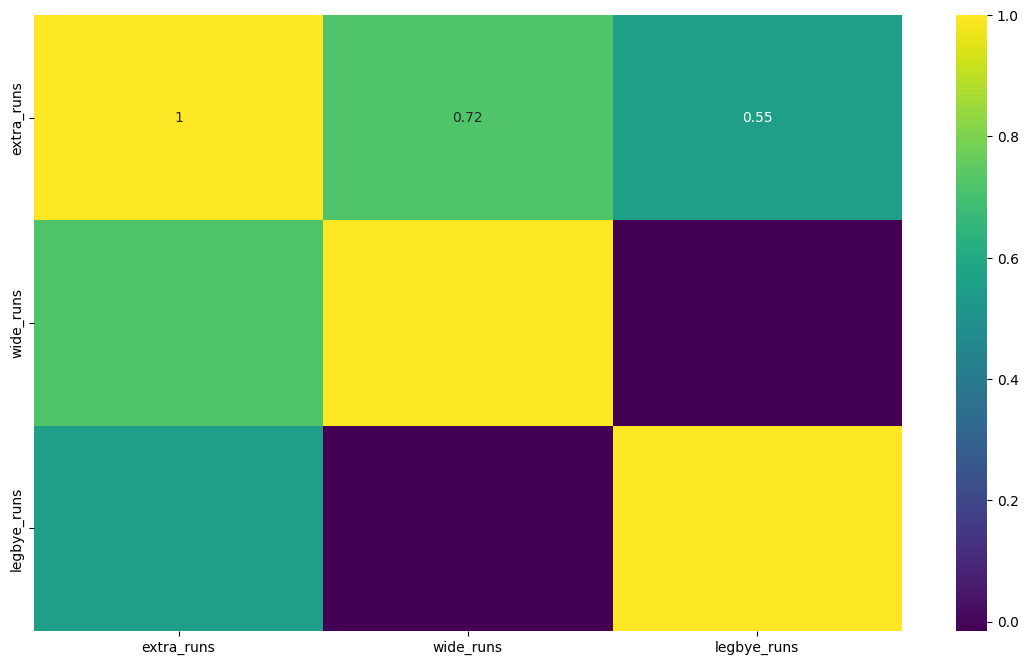

In [67]:
k = 3 #number of variables for heatmap
cols = df.corr().nlargest(k, target_col)[target_col].index
cm = df[cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [68]:
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)

In [69]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             extra_runs   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.432e+33
Date:                Sat, 25 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:16:48   Log-Likelihood:             6.0246e+06
No. Observations:              179078   AIC:                        -1.205e+07
Df Residuals:                  179066   BIC:                        -1.205e+07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.898e-17      6e-18     -9.835

In [70]:
lasso = Lasso()
params = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [71]:
lasso_regressor = GridSearchCV(lasso, params, 
                               scoring="neg_mean_squared_error", 
                               cv=5)

In [72]:
lasso_regressor.fit(X, y)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0]},
             scoring='neg_mean_squared_error')

In [73]:
lasso_regressor.best_score_


-1.1150043108819001e-13

In [74]:
lasso_regressor.best_estimator_


Lasso(alpha=1e-10)

In [75]:
lasso_best = lasso_regressor.best_estimator_


In [76]:
lasso_best.fit(X, y)


Lasso(alpha=1e-10)

<Axes: title={'center': 'Model Coefficients'}>

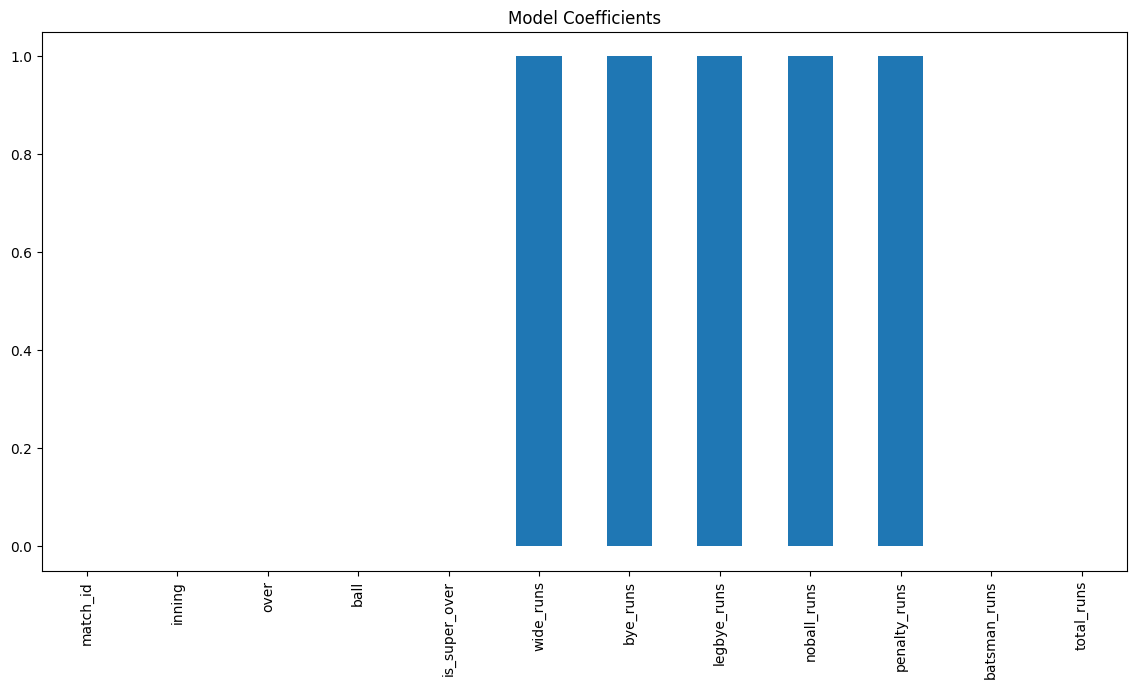

In [77]:
coef = pd.Series(lasso_best.coef_,list(X.columns))
coef.plot(kind='bar', title='Model Coefficients')